In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [63]:
df = pd.read_csv('data/telco_churn_data.csv')

In [109]:
newdf = df.drop(columns={'Customer ID','Offer','Internet Type','Churn Category','Customer Satisfaction','Churn Reason'})
newdf.isna().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Gender                               0
Age                      

In [86]:
#toEncode = ['Multiple Lines','Internet Service','Gender','Married','Dependents']
obj_cols = newdf.select_dtypes(include='object').columns
encoder = OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded = encoder.fit_transform(newdf[obj_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(obj_cols))
one_hot_df

,Referred a Friend_Yes,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,...,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7039,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7040,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df_encoded = pd.concat([newdf, one_hot_df], axis=1)

# Drop the original categorical columns to make the df only numerical
df_cleaned = df_encoded.drop(object_cols, axis=1)

In [91]:
df_cleaned.isna().sum()

Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
                                    ..
City_Yreka                           0
City_Yuba City                       0
City_Yucaipa                         0
City_Yucca Valley                    0
City_Zenia                           0
Length: 1146, dtype: int64

In [95]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [97]:
pca_all = PCA()
pca_all.fit(scaled_data)

PCA()

In [119]:
pca_all.explained_variance_ratio_.round(2)


array([0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

In [111]:
scree_data_all = pd.DataFrame({'Principle Component':range(1,len(pca_all.explained_variance_ratio_)+1),
                               'Explained Variance Ratio': pca_all.explained_variance_ratio_})
scree_data_all

,Principle Component,Explained Variance Ratio
0,1,5.759885e-03
1,2,3.774407e-03
2,3,3.404316e-03
3,4,2.482656e-03
4,5,2.071821e-03
...,...,...
1141,1142,3.053842e-05
1142,1143,7.747151e-07
1143,1144,1.833788e-07
1144,1145,7.718292e-08


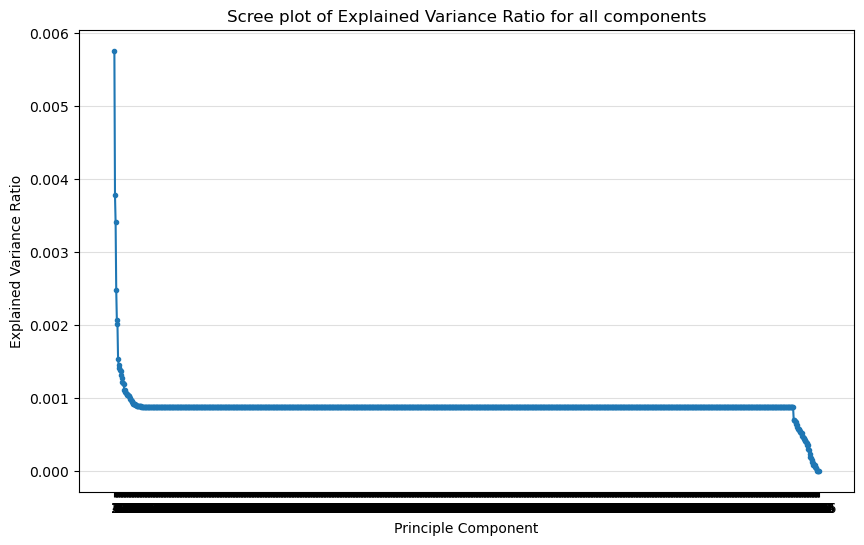

In [107]:
plt.figure(figsize=(10,6))
plt.plot(scree_data_all['Principle Component'],scree_data_all['Explained Variance Ratio'], marker='.')
plt.title('Scree plot of Explained Variance Ratio for all components')
plt.xlabel('Principle Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(scree_data_all['Principle Component'])
plt.grid(axis='y', alpha=0.4)
plt.show()

In [121]:
pca = PCA(n_components=3)
pca_results = pca.fit_transform(scaled_data)

In [123]:
type(pca_results)

numpy.ndarray

In [142]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(pca_results)
    inertia.append(kmeans.inertia_)
    

In [146]:
inertia

[104431.07716829992,
 70986.37958670684,
 53027.51832604125,
 42041.55540156352,
 35078.56581454479,
 29689.95758799337,
 26729.960863031716,
 24178.46028400532,
 22041.14246005032,
 20302.41343248309]

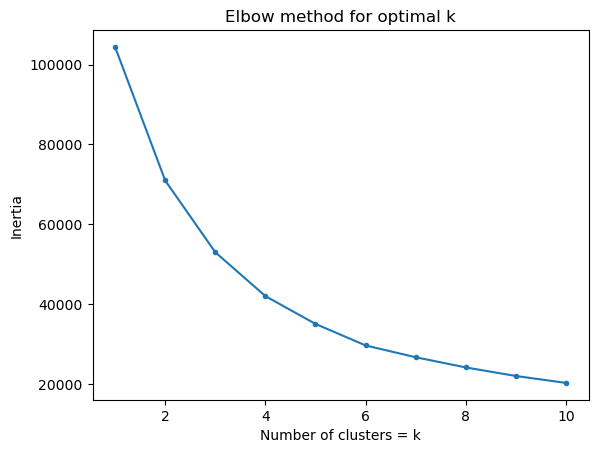

In [156]:
plt.plot(range(1,11),inertia, marker='.')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters = k')
plt.ylabel('Inertia')
plt.show()

In [158]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(pca_results)
df_cleaned['Cluster'] = cluster_labels

In [164]:
df_cleaned.head()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,...,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia,Cluster
0,0,1,0.00,9,41.236,39.65,0.00,0.0,0.00,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,8,48.85,19,83.876,633.30,0.00,120.0,390.80,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,18,11.33,57,99.268,1752.55,45.61,0.0,203.94,71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,25,19.76,13,102.440,2514.50,13.43,327.0,494.00,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,37,6.33,15,79.560,2868.15,0.00,430.0,234.21,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [166]:
df_cleaned['Cluster'].value_counts()

Cluster
0    2851
1    2298
2    1894
Name: count, dtype: int64

In [188]:
cluster_means = df_cleaned.groupby('Cluster').mean().round(2)
cluster_means

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,...,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.38,16.53,21.44,24.38,72.14,1187.87,1.77,141.61,322.18,49.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.45,54.82,24.69,29.43,89.17,4898.69,2.47,656.33,1333.52,46.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.51,29.04,23.14,6.09,26.94,748.10,1.64,26.13,682.65,43.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
#print(cluster_means.to_markdown(numalign='center',stralign='center'))

In [170]:
plot_df = pd.DataFrame({
    'x':pca_results[:,0],
    'y':pca_results[:,1],
    'Cluster': cluster_labels.astype(str)
})

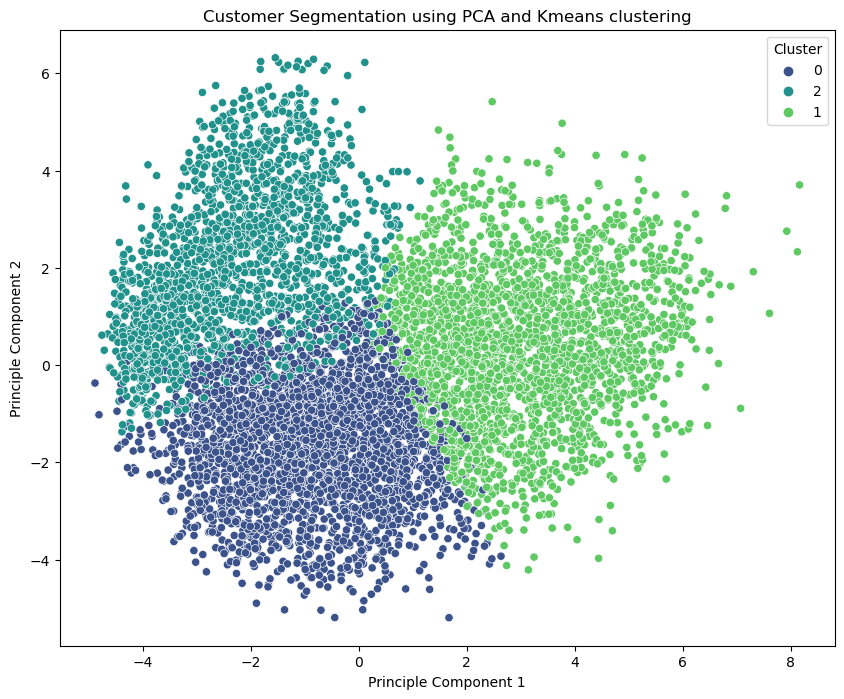

In [178]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=plot_df, x='x', y='y', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using PCA and Kmeans clustering')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()